# Tool to extract usefull information from mlperf trace

In [1]:
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import json
import os
import seaborn as sns
from operator import itemgetter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

figsize=(10, 5)
font=10

plt.figure(dpi=600)
plt.rc('xtick', labelsize=font) 
plt.rc('font', size=font)
sns.set(font_scale=1.4, style="whitegrid");

<Figure size 3600x2400 with 0 Axes>

In [2]:
def trace_to_df(fname):
    with open(fname, "r") as f:
        print(f)
        j = json.load(f)
    if type(j) == dict:
        j = j['traceEvents']
        
    result = []
    for item in j:
        name = item['name']
        if name not in ["Latency", "Sample", "QuerySamplesComplete", "IssueQuery"]:
            continue

        args = item.get('args')
        d = {"ts": item['ts'], "name": name, "dur": item.get("dur")}

        if name == "Latency":
            d["issue_delay"] = args["issue_delay"] /1e9
            d["issue_to_done"] = args["issue_to_done"] / 1e9
            result.append(d)
        elif name == "Sample":
            if args:
                d["issue_start_ns"] = args["issue_start_ns"]
                d["complete_ns"] = args["complete_ns"]
                d["issue_to_done"] = (args["complete_ns"] - args["issue_start_ns"]) / 1e9
                result.append(d)
        elif name == "QuerySamplesComplete":
            result.append(d)
        elif name == "IssueQuery":
            result.append(d)

    df = pd.DataFrame(result)
    df = df.sort_values(by=["ts"])
    return df

BINS = 10

In [3]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 1000000, 100)

In [4]:
df = trace_to_df('/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-1-10/mlperf_log_trace.json')
df.describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


,ts,dur,issue_start_ns,complete_ns,issue_to_done
count,4.915300e+04,2.457700e+04,24576.0,2.457600e+04,24576.000000
mean,5.896530e+07,9.064496e+03,519.0,1.175982e+11,117.598165
std,7.580279e+07,1.420478e+06,0.0,6.765727e+10,67.657268
min,1.674089e+05,1.559000e+00,519.0,7.957850e+08,0.795784
25%,1.674089e+05,2.918000e+00,519.0,5.901068e+10,59.010678
50%,1.674097e+05,3.191000e+00,519.0,1.174500e+11,117.449963
75%,1.176155e+08,3.466000e+00,519.0,1.763415e+11,176.341468
max,2.350200e+08,2.226891e+08,519.0,2.348526e+11,234.852616


In [6]:
df["name"].unique()

array(['Sample', 'IssueQuery', 'QuerySamplesComplete'], dtype=object)

In [7]:
df

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,1.674089e+05,Sample,NaN,519.0,7.957850e+08,0.795784
27322,1.674089e+05,Sample,NaN,519.0,1.305755e+11,130.575495
27320,1.674089e+05,Sample,NaN,519.0,1.305736e+11,130.573554
27318,1.674089e+05,Sample,NaN,519.0,1.305685e+11,130.568524
27316,1.674089e+05,Sample,NaN,519.0,1.305609e+11,130.560940
...,...,...,...,...,...,...
49144,2.350133e+08,QuerySamplesComplete,2.605,NaN,NaN,NaN
49146,2.350156e+08,QuerySamplesComplete,2.788,NaN,NaN,NaN
49148,2.350163e+08,QuerySamplesComplete,2.954,NaN,NaN,NaN
49150,2.350182e+08,QuerySamplesComplete,3.072,NaN,NaN,NaN


In [8]:
df1 = df[df["name"].isin(["Sample"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,167408.926,Sample,NaN,519.0,7.957850e+08,0.795784
27322,167408.926,Sample,NaN,519.0,1.305755e+11,130.575495
27320,167408.926,Sample,NaN,519.0,1.305736e+11,130.573554
27318,167408.926,Sample,NaN,519.0,1.305685e+11,130.568524
27316,167408.926,Sample,NaN,519.0,1.305609e+11,130.560940
...,...,...,...,...,...,...
2516,167408.926,Sample,NaN,519.0,1.255178e+10,12.551780
2004,167408.926,Sample,NaN,519.0,1.013901e+10,10.139005
8194,167408.926,Sample,NaN,519.0,3.956373e+10,39.563729
7718,167408.926,Sample,NaN,519.0,3.728248e+10,37.282479


In [9]:
df1 = df[df["name"].isin(["IssueQuery"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
46592,167409.695,IssueQuery,2.226891e+08,NaN,NaN,NaN


In [10]:
df1 = df[df["name"].isin(["Latency"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done


In [11]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
1,9.631954e+05,QuerySamplesComplete,29.786,NaN,NaN,NaN
3,1.130295e+06,QuerySamplesComplete,10.170,NaN,NaN,NaN
5,1.149159e+06,QuerySamplesComplete,24.483,NaN,NaN,NaN
7,1.169383e+06,QuerySamplesComplete,21.773,NaN,NaN,NaN
9,1.188150e+06,QuerySamplesComplete,21.100,NaN,NaN,NaN
...,...,...,...,...,...,...
49144,2.350133e+08,QuerySamplesComplete,2.605,NaN,NaN,NaN
49146,2.350156e+08,QuerySamplesComplete,2.788,NaN,NaN,NaN
49148,2.350163e+08,QuerySamplesComplete,2.954,NaN,NaN,NaN
49150,2.350182e+08,QuerySamplesComplete,3.072,NaN,NaN,NaN


# server scenario

In [12]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

path = "/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"
all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df.head()

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,server,1,1,105.669276,27.157685,27.273029,42.905730,48.540985,51.113650,53.164785,53.835172
1,resnet,none,32,1,server,1,2,104.791431,27.599205,27.739671,43.689288,49.516422,52.038368,54.140146,54.761402
2,resnet,none,32,1,server,1,3,104.655812,27.644232,27.747821,43.907962,49.623109,52.231704,54.285262,54.945996
3,resnet,none,32,1,server,1,4,105.523555,26.972252,26.952162,42.847528,48.535526,51.158035,53.400774,53.880831
4,resnet,none,32,1,server,1,5,103.837351,28.026396,28.019636,44.603628,50.451926,53.099162,55.179633,55.808865


In [13]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline
dfg = df
dfg

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,server,1,1,105.669276,27.157685,27.273029,42.905730,48.540985,51.113650,53.164785,53.835172
1,resnet,none,32,1,server,1,2,104.791431,27.599205,27.739671,43.689288,49.516422,52.038368,54.140146,54.761402
2,resnet,none,32,1,server,1,3,104.655812,27.644232,27.747821,43.907962,49.623109,52.231704,54.285262,54.945996
3,resnet,none,32,1,server,1,4,105.523555,26.972252,26.952162,42.847528,48.535526,51.158035,53.400774,53.880831
4,resnet,none,32,1,server,1,5,103.837351,28.026396,28.019636,44.603628,50.451926,53.099162,55.179633,55.808865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,resnet,cpumem,32,32,server,1,6,170.675563,4.695899,4.665624,6.758691,7.556922,7.919731,9.196826,10.561629
176,resnet,cpumem,32,32,server,1,7,170.470835,4.669378,4.648922,6.789040,7.644990,7.993970,9.192489,10.647057
177,resnet,cpumem,32,32,server,1,8,169.984274,4.671522,4.670446,6.805230,7.572088,7.907095,9.320812,10.781544
178,resnet,cpumem,32,32,server,1,9,170.516890,4.627807,4.753981,6.696741,7.495222,7.827970,9.217482,10.543904


In [22]:
# from numpy import percentile, mean, std

# l_gb = ['benchmark', 'cbatch','sbatch','numctn']

# df_results = []

# for model_name in df['benchmark'].unique():
#        df_bench = df[(df['benchmark']==model_name)] # everybenchmark
# #        print(df_bench)
#        for senario in df_bench.cscenario.unique():
#             df_senario = df_bench[df_bench.cscenario == senario]
#             df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
#                   'model_time_mean' : mean(x['qps']),
#                   'model_time_std' : std(x['qps']),
#               })).reset_index()
# #             s1 = pd.Series([model_name,senario,16,'C','CPU',np.nan,np.nan], \
# #                            index=['benchmark','senario','num_process','class','type','model_time_mean','model_time_std'])
# #             s2 = pd.Series([model_name,senario,16,'C','CPUMEM',np.nan,np.nan], \
# #                            index=['benchmark','senario','num_process','class','type','model_time_mean','model_time_std'])
#             df_results.append(df_senario)

In [23]:
# df_results = pd.concat(df_results, axis=0)
# df_results

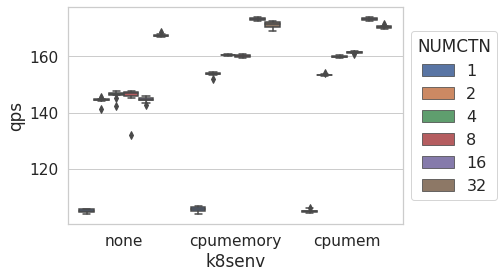

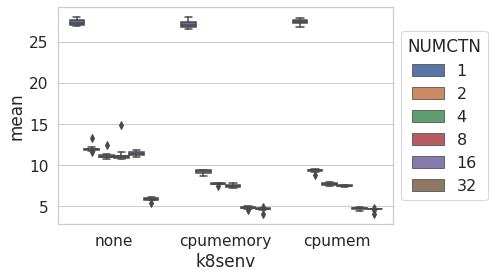

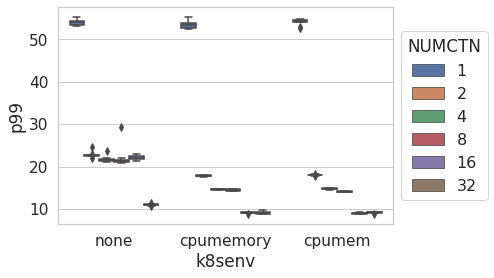

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

# import seaborn library
import seaborn as sns

for x in ['qps','mean','p99']:
    for cbatch in [1]:
        for model_name in ['resnet']:
            list_traces = []
#             for numctn in [1,2,4,8,16,32]: 
            dfg_bench = dfg[(dfg['benchmark']== model_name)  & (dfg['cbatch']==cbatch) & \
#                             (dfg['numctn']==numctn) &\
                        ((dfg['k8senv']=='none') |\
                         (dfg['k8senv']=='cpumem')| (dfg['k8senv']=='cpumemory'))]
#                 print(dfg_bench)

            sns.boxplot(x = dfg_bench['k8senv'],
                        y = dfg_bench[x],
                        hue = dfg_bench['numctn'])
            plt.legend(prop={'size': 16}, title = 'NUMCTN',loc='center left', bbox_to_anchor=(1, 0.5) )
            plt.show()


In [524]:
#y is the issue_start_ns
# df1 = df[df["name"].isin(["Sample"])]
# df1.reset_index(drop=True,inplace=True)
# ax = df1['issue_start_ns'].plot(figsize=figsize)
# ax.set(xlim=(0, 25000))
# ax.set_title('issue start time (usec)');

In [525]:
# df1['issue_start_ns'].sort_values

In [526]:
# df_time=df1['issue_start_ns'].shift()
# df_time
# df_time.dtype

In [527]:
#time poisson
# ax = df_time.plot(figsize=figsize)
# ax.set(xlim=(0, 10000))
# ax.set_title('issue start time (usec)');

In [528]:
# color=["blue","green","yellow","red","orange","grey"]
# x=0
# for add in ['none-resnet-1-32-S-1-10','none-resnet-2-32-S-1-10'
#             ,'none-resnet-4-32-S-1-10',
#            'none-resnet-8-32-S-1-10','none-resnet-16-32-S-1-10','none-resnet-32-32-S-1-10']:
#     df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
#     df1 = df[df["name"].isin(["IssueQuery"])]
#     print(max(df1['dur']))
# #     df1['delta'] = df1['ts'].diff()
# #     plt.hist(df1['dur'], 50, density=True, facecolor='g', alpha=0.75)
#     ax = df1['dur'].plot.hist(bins=HIST_BINS, alpha=0.5, figsize=figsize, fc=color[x])
#     ax.set_title('IssueQuery duration (usec)');
#     x = x+1
#     plt.show()

In [529]:
# df1 = df[df["name"].isin(["IssueQuery"])]
# df1['delta'] = df1['ts'].diff()
# ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# print(max(df1['dur']))
# ax.set_title('IssueQuery duration (usec)');
# # ax.set(xlim=(0, 80000))
# plt.show()
# ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Time between IssueQuery (usec)');

# # df1['delta'].describe()

In [530]:
# for SingleStream
# if True:
#     df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('Inference time (usec)');
#     plt.show()
#     ax = df1['dur'].plot(figsize=figsize)
#     ax.set(ylim=(0, 600))
#     ax.set_title('Individual inference time (usec)');

none
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
14.853358719
12.100512953
10.950983242077895
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
12.197900859
8.323450048
7.242738734377671
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
10.638847286
8.109284959
7.240636869760616
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
10.404072033
8.021548808
7.1521449957617085
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-S-1-10/mlperf_log_tra

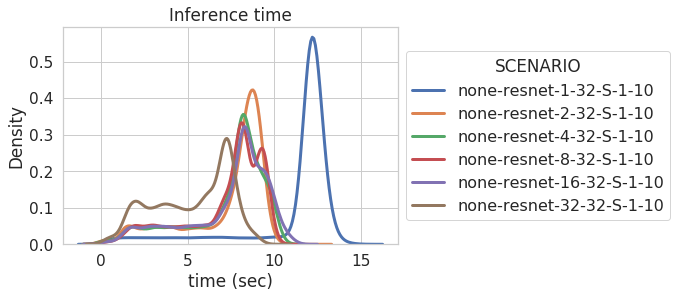

cpumem
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumem-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
14.514038295
11.909649161
10.752006299836285
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumem-resnet-2-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
11.013116667
7.640328067
6.650142767991813
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumem-resnet-4-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
9.852288602
7.182321912
6.171979564130622
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumem-resnet-8-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
9.689107669
7.071582694
6.052427839933953
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumem-resnet-16-32-S-1-10/mlper

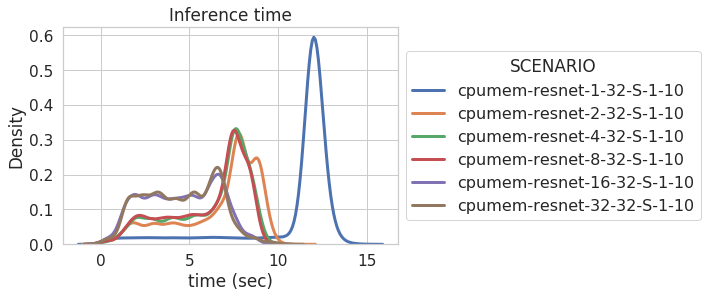

cpumemory
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
14.64028811
11.847271516
10.692699313341343
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
10.464516342
7.606124531
6.5598777608811645
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
9.468811366
7.210273446
6.1864126139339355
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
10.388978961
6.851192086
6.007432621057733
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resne

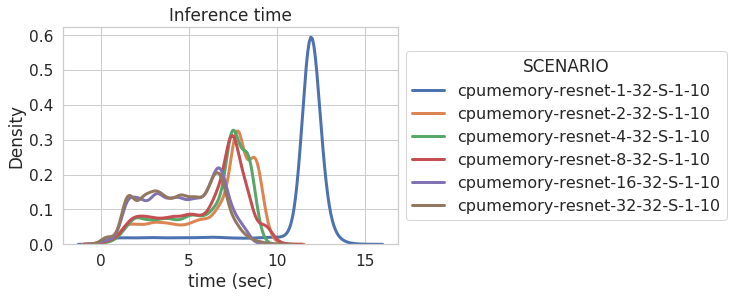

In [29]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]

for sc in ['none','cpumem','cpumemory']:
    print(sc)
    SCEN=[sc+'-resnet-1-32-S-1-10',
          sc+'-resnet-2-32-S-1-10',
             sc+'-resnet-4-32-S-1-10',
               sc+'-resnet-8-32-S-1-10',
          sc+'-resnet-16-32-S-1-10',
          sc+'-resnet-32-32-S-1-10']
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Latency"])]
        print(max(df1['issue_to_done']))
        print(np.median(df1['issue_to_done']))
        print(np.mean(df1['issue_to_done']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = SCEN[x])
        x=x+1

    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('Inference time')
    plt.xlabel('time (sec)')
    plt.ylabel('Density')
    plt.show()

none
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-32-32-S-1-10/mlperf_log_trace.

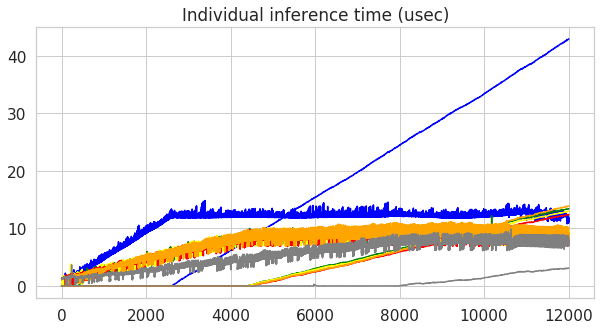

cpumem
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumem-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumem-resnet-2-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumem-resnet-4-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumem-resnet-8-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumem-resnet-16-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumem-resnet-32-32-S-1-10/mlp

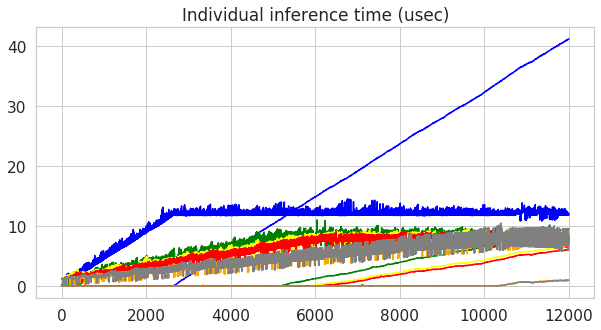

cpumemory
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-re

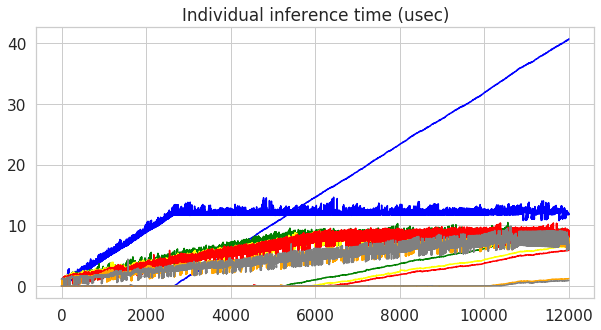

In [30]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for sc in ['none','cpumem','cpumemory']:
    print(sc)
    SCEN=[sc+'-resnet-1-32-S-1-10',
          sc+'-resnet-2-32-S-1-10',
             sc+'-resnet-4-32-S-1-10',
               sc+'-resnet-8-32-S-1-10',
          sc+'-resnet-16-32-S-1-10',
          sc+'-resnet-32-32-S-1-10']
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Latency"])]
        df1.reset_index(drop=True,inplace=True)
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x])
        ax = df1['issue_delay'].plot(figsize=figsize, color=color[x])
        ax.set_title('Individual inference time (usec)');
    #     ax.set(ylim=(0, 100))
        x=x+1
    plt.show()

In [469]:
# df1 = df[df["name"].isin(["Latency"])]
# ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Inference time (usec)');
# #ax.set(xlim=(0, 25000))
# plt.xticks(rotation=60)
# plt.show()

# ax = df1['issue_to_done'].plot(figsize=figsize)
# ax.set_title('Individual inference time (usec)');
# #ax.set(ylim=(0, 200))
# plt.show()


# # df1['issue_to_done'].describe()

In [468]:
# df1 = df[df["name"].isin(["QuerySamplesComplete"])]
# df1['delta'] = df1['ts'].diff()
# ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Time between QuerySamplesComplete (usec)');
# plt.show()

# ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Time QuerySamplesComplete (usec)');